In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle
import pandas as pd

## History Files

In [12]:
with open('../history/binary_trainHistory', 'rb') as history_file:
        binary_history = pickle.load(history_file)

In [13]:
with open('../history/CWE119_trainHistory', 'rb') as history_file:
        CWE119_history = pickle.load(history_file)

In [14]:
with open('../history/CWE120_trainHistory', 'rb') as history_file:
        CWE120_history = pickle.load(history_file)

In [15]:
with open('../history/CWE469_trainHistory', 'rb') as history_file:
        CWE469_history = pickle.load(history_file)

In [17]:
with open('../history/CWE476_trainHistory', 'rb') as history_file:
        CWE470_history = pickle.load(history_file)

In [18]:
with open('../history/CWE-others_trainHistory', 'rb') as history_file:
        others_history = pickle.load(history_file)

In [19]:
binary_history.keys()

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])

## Training Loss

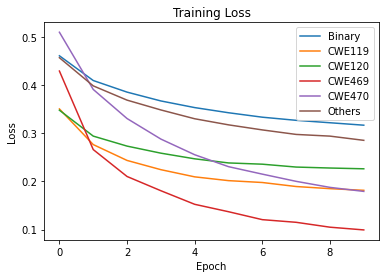

In [110]:
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(binary_history['loss'], label='Binary')
plt.plot(CWE119_history['loss'], label='CWE119')
plt.plot(CWE120_history['loss'], label='CWE120')
plt.plot(CWE469_history['loss'], label='CWE469')
plt.plot(CWE470_history['loss'], label='CWE470')
plt.plot(others_history['loss'], label='Others')
plt.legend()
plt.savefig('train_loss.png')

In [34]:
test_data = pd.read_pickle("../dataset/test.pickle")

In [43]:
with open('../tokenizer/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [44]:
test_tokenized = tokenizer.texts_to_sequences(test_data[0])
x_test = tf.keras.preprocessing.sequence.pad_sequences(test_tokenized, maxlen=500, padding="post")

In [45]:
binary_model = tf.keras.models.load_model('../trained_model/Simple_CNN_binary')

In [46]:
y_test_binary = (test_data[test_data.columns[1:]]).any(axis=1, bool_only=bool).astype(int)

In [47]:
CWE119_model = tf.keras.models.load_model('../trained_model/Simple_CNN_CWE119')

In [48]:
y_test_CWE119 = test_data[test_data.columns[1]].astype(int)

In [49]:
CWE120_model = tf.keras.models.load_model('../trained_model/Simple_CNN_CWE120')

In [50]:
y_test_CWE120 = test_data[test_data.columns[2]].astype(int)

In [51]:
CWE469_model = tf.keras.models.load_model('../trained_model/Simple_CNN_CWE469')

In [52]:
y_test_CWE469 = test_data[test_data.columns[3]].astype(int)

In [53]:
CWE476_model = tf.keras.models.load_model('../trained_model/Simple_CNN_CWE476')

In [54]:
y_test_CWE476 = test_data[test_data.columns[4]].astype(int)

In [55]:
others_model = tf.keras.models.load_model('../trained_model/Simple_CNN_CWE-others')

In [56]:
y_test_others = test_data[test_data.columns[5]].astype(int)

In [57]:
binary_test = binary_model.evaluate(x_test, y_test_binary, batch_size=128)

996/996 [==============================] - 87s 87ms/step - loss: 0.3855 - tp: 6496.0000 - fp: 18857.0000 - tn: 100309.0000 - fn: 1757.0000 - accuracy: 0.8382 - precision: 0.2562 - recall: 0.7871 - auc: 0.8785


In [60]:
CWE119_test = CWE119_model.evaluate(x_test, y_test_CWE119, batch_size=128)

996/996 [==============================] - 82s 82ms/step - loss: 0.1933 - tp: 1976.0000 - fp: 8410.0000 - tn: 116557.0000 - fn: 476.0000 - accuracy: 0.9303 - precision: 0.1903 - recall: 0.8059 - auc: 0.9275


In [61]:
CWE120_test = CWE120_model.evaluate(x_test, y_test_CWE120, batch_size=128)

996/996 [==============================] - 85s 85ms/step - loss: 0.2670 - tp: 4180.0000 - fp: 11467.0000 - tn: 111061.0000 - fn: 711.0000 - accuracy: 0.9044 - precision: 0.2671 - recall: 0.8546 - auc: 0.9274


In [62]:
CWE469_test = CWE469_model.evaluate(x_test, y_test_CWE469, batch_size=128)

996/996 [==============================] - 94s 94ms/step - loss: 0.1580 - tp: 171.0000 - fp: 5870.0000 - tn: 121271.0000 - fn: 107.0000 - accuracy: 0.9531 - precision: 0.0283 - recall: 0.6151 - auc: 0.8540


In [63]:
CWE476_test = CWE476_model.evaluate(x_test, y_test_CWE476, batch_size=128)

996/996 [==============================] - 94s 94ms/step - loss: 0.2025 - tp: 808.0000 - fp: 10339.0000 - tn: 115888.0000 - fn: 384.0000 - accuracy: 0.9158 - precision: 0.0725 - recall: 0.6779 - auc: 0.8496


In [64]:
others_test = others_model.evaluate(x_test, y_test_others, batch_size=128)

996/996 [==============================] - 90s 90ms/step - loss: 0.2960 - tp: 2640.0000 - fp: 17149.0000 - tn: 106780.0000 - fn: 850.0000 - accuracy: 0.8587 - precision: 0.1334 - recall: 0.7564 - auc: 0.8812 2s - loss: 0.2967 - tp: 2549.0000 - fp: 16629.0000 - tn: 103256.0000 - fn: 830.0000 - accuracy: 0.8584 - precision: 0.13


## Testing Results

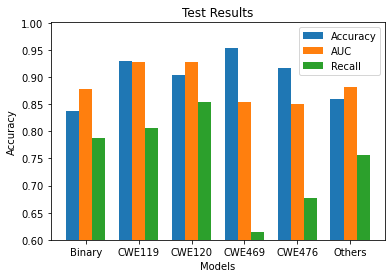

In [111]:
accuracy = [binary_test[5], CWE119_test[5], CWE120_test[5], CWE469_test[5], CWE476_test[5], others_test[5]]
AUC = [binary_test[8], CWE119_test[8], CWE120_test[8], CWE469_test[8], CWE476_test[8], others_test[8]]
recall = [binary_test[7], CWE119_test[7], CWE120_test[7], CWE469_test[7], CWE476_test[7], others_test[7]]
tick_label = ['Binary', 'CWE119', 'CWE120', 'CWE469', 'CWE476', 'Others']

x=np.arange(6)

width=0.25

plt.bar(x - width, accuracy, width=width, label='Accuracy')
plt.bar(x, AUC, width=width, label='AUC')
plt.bar(x + width, recall, width=width, label='Recall')
plt.title('Test Results')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.legend()
plt.xticks(x,tick_label)
plt.ylim(ymin = 0.6)
plt.savefig('test_results.png')